<a href="https://colab.research.google.com/github/philsaurabh/Tutorials/blob/main/PCA_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [13]:
# To read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Credit.csv')
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


# PCA in scikit-learn

In [14]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints
encoder = LabelEncoder()
# Now apply the transformation to all the columns:
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
X = df.iloc[:,1:12].values
y = df.iloc[:,0].values
X_std = StandardScaler().fit_transform(X)

In scikit-learn estimator api,

fit() : used for generating learning model parameters from training data

transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

fit_transform() : combination of fit() and transform() api on same data set

In [15]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn.shape)

(400, 5)


In [16]:
# Variance
pca = PCA()
pca.fit_transform(X_std)
pca_variance = pca.explained_variance_
print(pca_variance)

[3.28475263 1.17163109 1.13492056 1.04879032 1.01122112 0.97859626
 0.95166312 0.82164462 0.5719286  0.04772453 0.00469608]


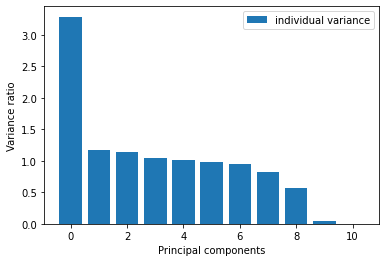

In [17]:
# Visualization

plt.figure()
plt.bar(range(11), pca_variance, label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

# Additional

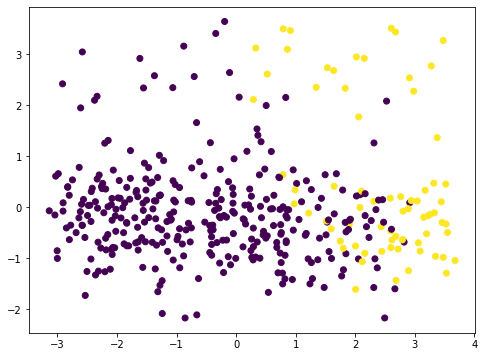

In [18]:
pca2 = PCA(n_components=2)
pca2.fit(X_std)
x_3d = pca2.transform(X_std)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=df['Defaultee'])
plt.show()

In [19]:
pca2 = PCA(n_components=6)
pca2.fit(X_std)
x_3d = pca2.transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.8, test_size = 0.2)# random_state = 100

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

0.03425898753299306


-0.05482671657660121

In [20]:
pca2 = PCA(n_components=2)
pca2.fit(X_std)
x_3d = pca2.transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.8, test_size = 0.2)# random_state = 100
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

0.037045658683488414


-0.03804769059514013